# Build Classification Models

In [5]:
'''Plan'''
'''
First thing first, import libraries
1. Inspect or eyeball data
2. Clean data if necessary
3. Filter through dataset and create a dataset individual cuisines
4. define a function that returns the ingredients specific to each cuisine
5. Plot bar chart of top 20 ingredients for respective cuisine and inspect top 10 ingredients
6. Remove any overlap in ingredients (rice, groundnut oil, garlic, cayenne, ginger, )
7. Oversample data
8. Compare old data to oversampled data
9. Join Feature with Label (independent variables VS dependent variable)
10. Save data to CSV

11. Data is ready for classification model
12.
13.
14.
15.


'''

'\nFirst thing first, import libraries\n1. Inspect or eyeball data\n2. Clean data if necessary\n3. Filter through dataset and create a dataset individual cuisines\n4. define a function that returns the ingredients specific to each cuisine\n5. Plot bar chart of top 20 ingredients for respective cuisine and inspect top 10 ingredients\n6. Remove any overlap in ingredients (rice, groundnut oil, garlic, cayenne, ginger, )\n7. Oversample data\n8. Compare old data to oversampled data\n9. Join Feature with Label (independent variables VS dependent variable)\n10. Save data to CSV\n\n11. Data is ready for classification model\n12.\n13.\n14.\n15.\n\n\n'

Import libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np 

import chart_studio.plotly as py
import cufflinks as cf
import plotly.express as px
import plotly.graph_objects as go  
fig = go.Figure()
%matplotlib inline

# Make Plotly work in your Jupyter Notebook
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
# Use Plotly locally
cf.go_offline()


from imblearn.over_sampling import SMOTE



import os 
os.chdir('/Users/tomisin/Library/docs/com~apple~CloudDocs/c.Documents/REdi/Machine_Learning/ML-For-Beginners-main/4-Classification/My_workspace/Machine_learning')
df = pd.read_csv('/Users/tomisin/Library/docs/com~apple~CloudDocs/c.Documents/REdi/Machine_Learning/ML-For-Beginners-main/4-Classification/My_workspace/Machine_learning/cuisines.csv')

df.head()


1. Inspect or eyeball data

In [ ]:
#shows information about the data
print(df.info()) 
print(df.head(5))
print(df.tail(5))


#shows data contains binary values 0 and 1 only
cols = df.columns.values.tolist()
for item in cols:
    print(df[item].unique())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2448 entries, 0 to 2447
Columns: 385 entries, Unnamed: 0 to zucchini
dtypes: int64(384), object(1)
memory usage: 7.2+ MB
None
   Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
0          65  indian       0         0      0           0      0   
1          66  indian       1         0      0           0      0   
2          67  indian       0         0      0           0      0   
3          68  indian       0         0      0           0      0   
4          69  indian       0         0      0           0      0   

   apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
0             0        0         0  ...        0            0           0   
1             0        0         0  ...        0            0           0   
2             0        0         0  ...        0            0           0   
3             0        0         0  ...        0            0           0   
4             0        0

2. Clean data if necessary

In [ ]:
'''The next step in data analysis is to clean your data by 
1. checking for any missing values and replacing them using the 'fillna' method, 
2. dropping duplicate rows or columns if any, 
3. skipping unimportant columns if necessary
4. renaming columns to preferred names
5. filter unwanted outliers'''

#for non-null/missing values
print(df.isna().sum().tolist())
#for duplicate columns
print(df.columns.duplicated().tolist()) 
 #for duplicate rows
print(df.duplicated().tolist())


#THERE ARE NEITHER MISSING VALUES NOR DUPLICATE ROWS OR COLUMNS IN THIS DATASET


[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [ ]:
df.head()

,Unnamed: 0,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,65,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,66,indian,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,67,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,68,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,69,indian,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


3. Filter through dataset and create a dataset for individual cuisines

In [ ]:
print(df['cuisine'].unique())

thai_df = df[(df['cuisine']== 'thai')]
chinese_df = df[(df['cuisine']== 'chinese')]
japanese_df = df[(df['cuisine']== 'japanese')]
korean_df = df[(df['cuisine']== 'korean')]
indian_df = df[(df['cuisine']== 'indian')]

print(thai_df.head())

print(f'thai_df : {thai_df.shape}')
print(f'chinese_df : {chinese_df.shape}')
print(f'indian_df : {indian_df.shape}') #returns shape of individual cuisine
print(f'japanese_df : {japanese_df.shape}')
print(f'korean_df : {korean_df.shape}')



['indian' 'thai' 'chinese' 'japanese' 'korean']
     Unnamed: 0 cuisine  almond  angelica  anise  anise_seed  apple  \
274        2333    thai       0         0      0           0      0   
275        2334    thai       0         0      0           0      0   
276        2335    thai       0         0      0           0      0   
277        2336    thai       0         0      0           0      0   
278        2337    thai       0         0      0           0      0   

     apple_brandy  apricot  armagnac  ...  whiskey  white_bread  white_wine  \
274             0        0         0  ...        0            0           0   
275             0        0         0  ...        0            0           0   
276             0        0         0  ...        0            0           0   
277             0        0         0  ...        0            0           0   
278             0        0         0  ...        0            0           0   

     whole_grain_wheat_flour  wine  wood  yam  yea

In [ ]:
df.cuisine.unique()

array(['indian', 'thai', 'chinese', 'japanese', 'korean'], dtype=object)

In [ ]:
ingredients_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
ingredients_df.T

,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,artichoke,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
value,45.0,0.0,1.0,7.0,34.0,0.0,13.0,0.0,6.0,0.0,...,0.0,2.0,51.0,10.0,166.0,0.0,4.0,38.0,145.0,21.0


4. Define a function that returns the ingredients specific to each cuisine

In [ ]:
def create_ingredients_df(df):
    # transpose df, drop cuisine and unnamed rows, sum the row to get total for ingredient and add value header to new df
    ingredient_df = df.T.drop(['cuisine','Unnamed: 0']).sum(axis=1).to_frame('value')
    # drop ingredients that have a 0 sum
    ingredient_df = ingredient_df[(ingredient_df.T != 0).any()]
    # sort df
    ingredient_df = ingredient_df.sort_values(by='value', ascending=False, inplace=False)
    return ingredient_df

In [ ]:
create_ingredients_df(thai_df)

,value
garlic,173.0
fish,153.0
cayenne,136.0
cilantro,121.0
ginger,114.0
...,...
ham,1.0
kale,1.0
buckwheat,1.0
roasted_beef,1.0


5. Plot bar chart of top 20 ingredients for respective cuisine and inspect top 10 ingredients

<AxesSubplot:>

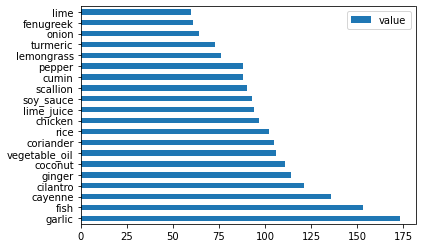

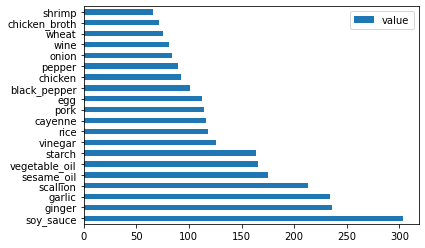

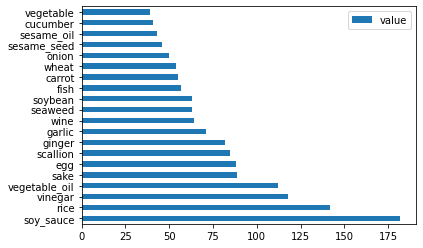

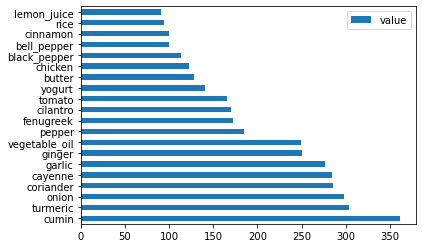

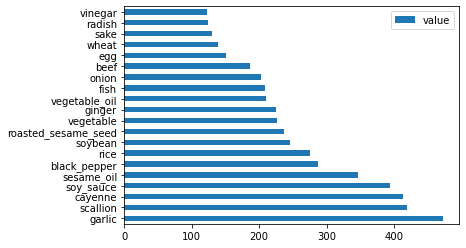

In [ ]:
thai_ingredients_df = create_ingredients_df(thai_df)
thai_ingredients_df.head(20).plot.barh()

chinese_ingredients_df = create_ingredients_df(chinese_df)
chinese_ingredients_df.head(20).plot.barh()

japanese_ingredients_df = create_ingredients_df(japanese_df)
japanese_ingredients_df.head(20).plot.barh()

indian_ingredients_df = create_ingredients_df(indian_df)
indian_ingredients_df.head(20).plot.barh()

korean_ingredients_df = create_ingredients_df(korean_df)
korean_ingredients_df.head(20).plot.barh()

6. Drop any recurring ingredients (rice, groundnut oil, garlic, cayenne, ginger) found in each cuisine

In [ ]:

feature_df = df.drop(['Unnamed: 0', 'cuisine', 'rice', 'garlic', 'ginger','cayenne'], axis= 1)
label_df = df['cuisine']

7. Oversample data

In [ ]:
oversample = SMOTE()
transformed_feature_df, transformed_label_df = oversample.fit_resample(feature_df,label_df)

8. Check if oversampling worked -Data is now balanced to the highest class count (799), all thanks to SMOTE

In [ ]:
print(f'new data count {transformed_label_df.value_counts()}')
print(f'old data count {label_df.value_counts()}')

new data count indian      799
thai        799
chinese     799
japanese    799
korean      799
Name: cuisine, dtype: int64
old data count korean      799
indian      598
chinese     442
japanese    320
thai        289
Name: cuisine, dtype: int64


9. Join Feature with Label (independent variables VS dependent variable)

In [ ]:
transformed_label_df.head()

0    indian
1    indian
2    indian
3    indian
4    indian
Name: cuisine, dtype: object

In [ ]:
new_df = pd.concat([transformed_label_df, transformed_feature_df],axis= 1, join ='outer')

In [ ]:
new_df.head()

,cuisine,almond,angelica,anise,anise_seed,apple,apple_brandy,apricot,armagnac,artemisia,...,whiskey,white_bread,white_wine,whole_grain_wheat_flour,wine,wood,yam,yeast,yogurt,zucchini
0,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,indian,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,indian,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


10. Save csv to file with .to_csv

In [ ]:
new_df.to_csv('cleaned_cuisine.csv', index=False)